# Analysing Credit Card Defaults

## Exploratory Data Analysis

Import required libraries

In [54]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset obtained from Kaggle: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [57]:
df = pd.read_csv('/Users/winlaeyee/Downloads/UCI_Credit_Card.csv')
df.shape

(30000, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# EDA

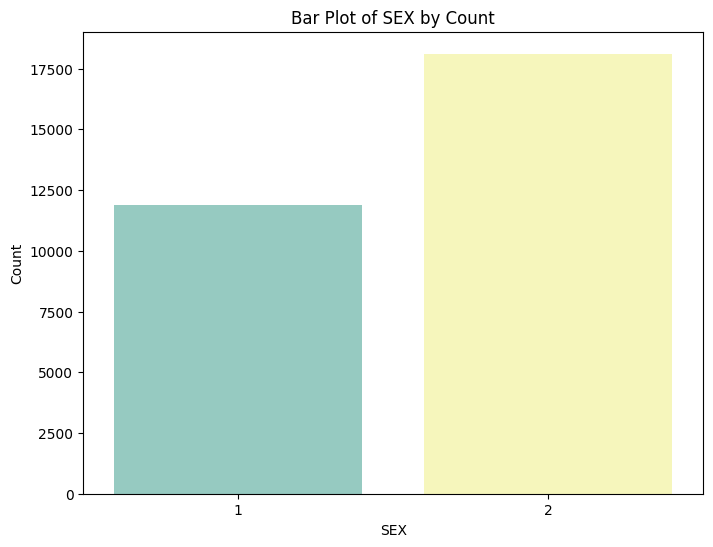

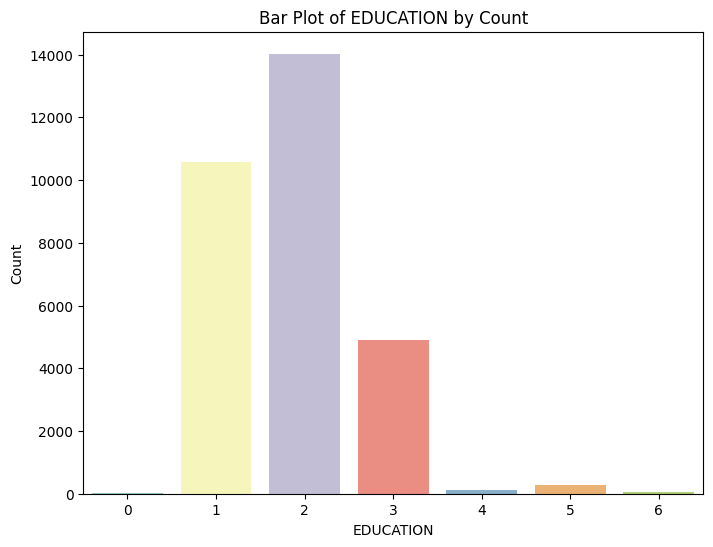

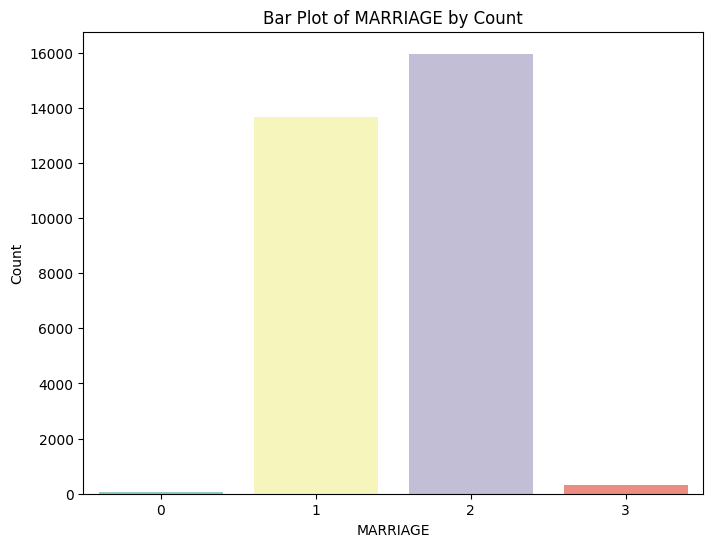

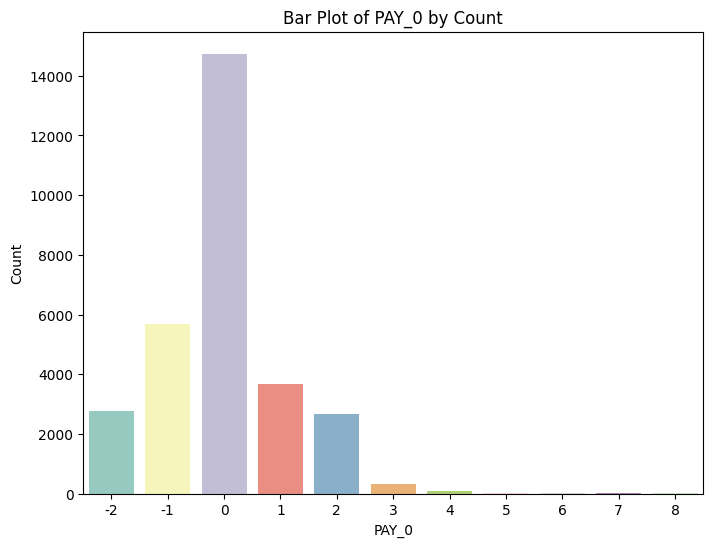

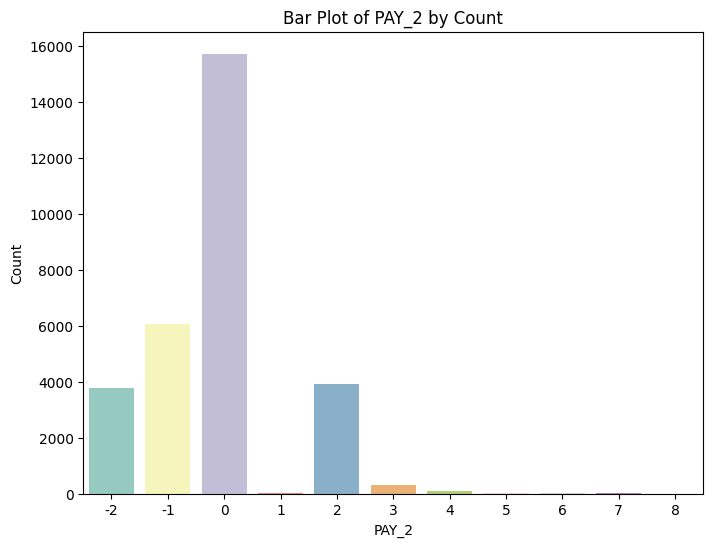

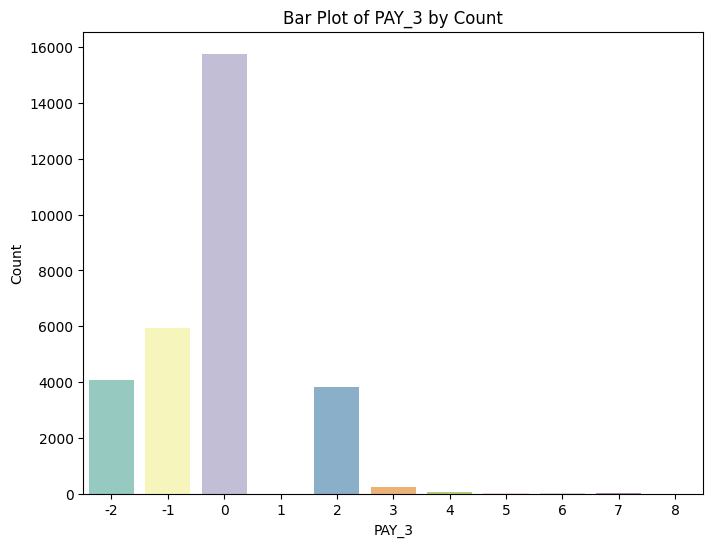

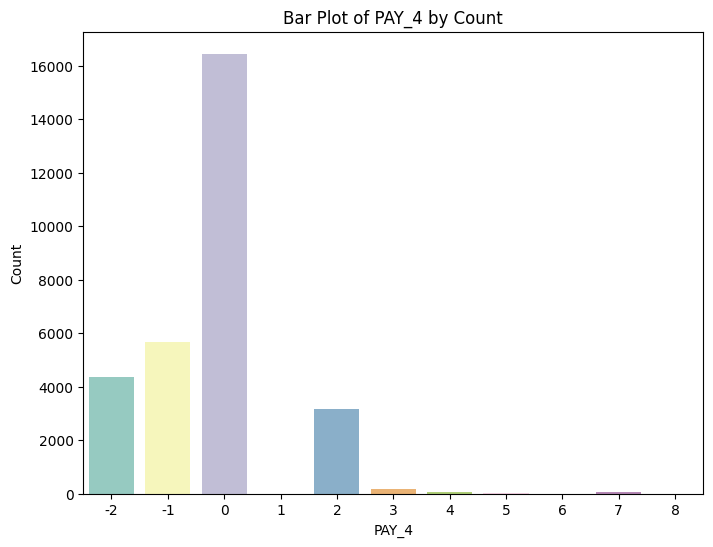

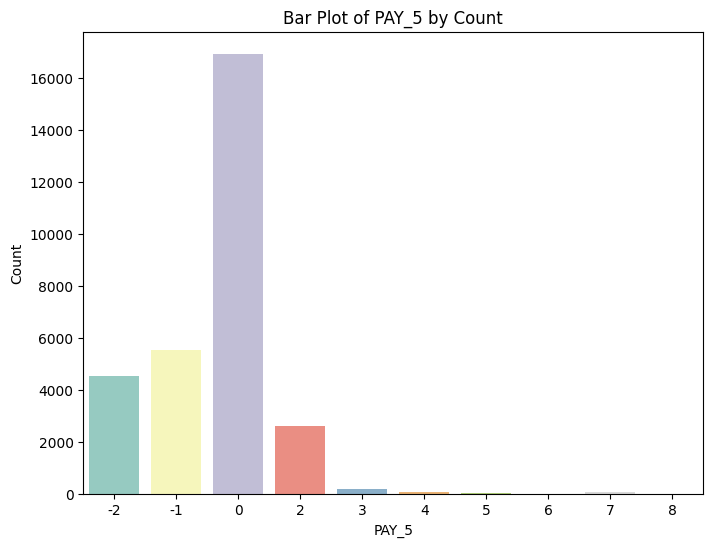

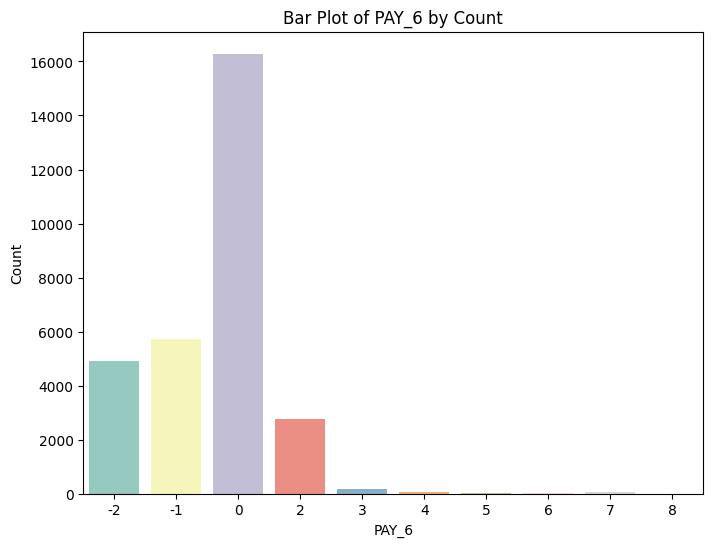

In [62]:
supposed_categorical_variables = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Create bar plots for each categorical variable
for variable in supposed_categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=variable, palette="Set3")
    plt.title(f"Bar Plot of {variable} by Count")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.show()

# Data Pre-Processing

In [21]:
# checking for missing data
df.isnull().sum().sort_values(ascending=False)

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default.payment.next.month    0
dtype: int64

According to the dataset description, the education column has 6 values: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). Marriage column has 3 values: (1=married, 2=single, 3=others). However, upon further inspection, both education and marriage column has value 0. 

Hence, for education
- we can combine 0, 5 and 6 with 4 under 'Others'.

For marriage
- we can combine 0 with 3 under 'Others'.

Then, for education, marriage and sex columns
Then, we can convert the numerical column to a categorical column with useful information as the values rather than numbers.
Then, we will generate dummy columns for all 3 column.

In [48]:
print(df["EDUCATION"].unique())
print(df["SEX"].unique())
print(df["MARRIAGE"].unique())

['Undergraduate', 'Graduate', 'High School', 'Others']
Categories (4, object): ['Graduate', 'Undergraduate', 'High School', 'Others']
[2 1]
[1 2 3 0]


In [51]:
df["EDUCATION"].replace({0: 4, 5: 4, 6: 4}, inplace=True)
df["EDUCATION"] = pd.Categorical(df["EDUCATION"])
df["EDUCATION"].replace({1: 'Graduate', 2: 'Undergraduate', 3: 'High School', 4: 'Others'}, inplace=True)

df["SEX"] = pd.Categorical(df["SEX"])
df["SEX"].replace({1: 'Male', 2: 'Female'}, inplace=True)

df["MARRIAGE"].replace({0: 3}, inplace=True)
df["MARRIAGE"] = pd.Categorical(df["MARRIAGE"])
df["MARRIAGE"].replace({1: 'Married', 2: 'Single', 3: 'Others'}, inplace=True)

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,Undergraduate,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,Undergraduate,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,Undergraduate,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,Undergraduate,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,Undergraduate,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [53]:
dummy_col = pd.get_dummies(df[['EDUCATION', 'SEX', 'MARRIAGE']], drop_first=True) #to prevent multicollinearity
categorical_col = list(dummy_col.columns)
categorical_col

df = pd.concat([df, dummy_col], axis='columns')
df = df.drop(['EDUCATION', 'SEX', 'MARRIAGE'], axis='columns')
df.head()


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_Undergraduate,EDUCATION_High School,EDUCATION_Others,SEX_Female,MARRIAGE_Single,MARRIAGE_Others
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,1,1,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,1,0,0,1,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,1,0,0,1,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,1,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,1,0,0,0,0,0
